# Setup :)

## Paquetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Colores

Generamos espacios de color para graficar utilizando https://www.sessions.edu/color-calculator/ para calcular colores complementarios a partir de un color de base y https://mycolor.space/ para calcular automaticamente la serie monocromática de colores. 

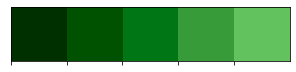

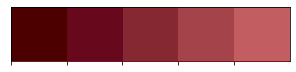

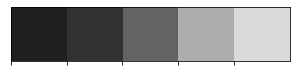

In [2]:
colors_green = ["#61C25E","#379B3A","#007615","#005200","#003000"][::-1]
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#C25E62","#A44349","#862832","#68081C","#4C0000"][::-1]
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

In [3]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
lista_bin,lista_nobin = [],[]
for i in df.columns:
    if len(df[f'{i}'].value_counts())==2:
        lista_bin.append(i)
    else:
        lista_nobin.append(i)
else:
    print('Las variables binarias son: ',', '.join(lista_bin),'\n'+'-'*150+'\n','Las variables no binarias son: ',', '.join(lista_nobin))

Las variables binarias son:  anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT 
------------------------------------------------------------------------------------------------------------------------------------------------------
 Las variables no binarias son:  age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time


In [8]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
d= pd.DataFrame(df['DEATH_EVENT'].value_counts())
fig = px.pie(d,values='DEATH_EVENT',names=['Muerte','No-muerte'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_red[3],colors_green[3]],
             labels={'label':'Potabilidad','Potabilidad':'No. de muestras'})

fig.add_annotation(text='El data-set esta desbalanceado',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Mortalidad',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q.Cuantos pacientes murieron ante la urgencia?',x=0.47,y=0.98,
               font=dict(color=colors_dark[3],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor=colors_red[-1]))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [10]:
def histo_comp(df,variable,categor='DEATH_EVENT',titulo='Acá va un titulo',nbins=100):
        """Función para crear un histograma+diagram de caja, usando plotly, a partir de una variable y
        categorizada por default usando eventos positivos(1) y negativos(0) 

    Args:
        df (DataFrame): datos
        variable (Series): variable a graficar
        categor(str)= Categoria para segmentar los datos
        titulo (str, optional): Reemplazar por el nombre de la variable. Defaults to 'Acá va un titulo'.
        nbins (int, optional): Cantidad de columnas del histograma. Defaults to 100.
    """
        fig = px.histogram(df,x=variable,color=categor,template='ggplot2',
                  marginal='box',opacity=0.7,nbins=nbins,color_discrete_sequence=[colors_red[3],colors_green[3]],
                  barmode='group',histfunc='count')

        fig.update_layout(
        font_family='monospace',
        title=dict(text=titulo,x=0.53,y=0.95,
                   font=dict(color=colors_dark[2],size=20)),
        xaxis_title_text=f'{titulo}',
        yaxis_title_text='Count',
        legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
        bargap=0.1,
        )
        fig.show()



## Análisis de variables no binarias respecto a la mortalidad de la emergencia

In [11]:
lista_nobin

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

### Edad

In [12]:
histo_comp(df,variable='age',titulo='Edad en años',nbins=40)

In [13]:
histo_comp(df,variable='creatinine_phosphokinase',titulo='Creatinfosfoquinasa',nbins=50)

In [14]:
histo_comp(df,variable='ejection_fraction',titulo='Fracción de Eyección',nbins=40)

In [15]:
k = df.drop('DEATH_EVENT', axis=1).corr()

fig = px.imshow(k,height=700,width=700,color_continuous_scale=colors_red[::-1],template='ggplot2')


fig.update_layout(font_family='monospace',
                  title=dict(text='Mapa de calor de la correlación',
                             x=0.53,
                             y=0.85,
                             font=dict(color=colors_dark[2],size=24)),
                  coloraxis_colorbar=dict(len=0.7,x=1.1)
                 )
fig.show()

### Modelsss

In [16]:
def wrapper(X,y,model,size=0.2,seed=27):
    """A partir de unas variables descriptoras(X) y su variable objetivo(y) se entrena un modelo de clasificación por default,
    partiendo los datos originales en sus respectivos conjuntos de entrenamiento y prueba, imprime una matriz de confusión,
    imprime un puntaje(score) basado en accuracy e imprime un reporte con métricas para evaluar la clasificación. Además
    devuelve el modelo final.

    Args:
        X (Dataframe or Series): Conjunto de variables descriptoras de la variable objetivo
        y (Dataframe or Series): Variable objetivo a clasificar
        model (object): objeto que almacene un modelo predictivo
        size (float, optional): Tamaño en que vamos a partir del DF. Defaults to 0.2.
        seed (int, optional): Semilla para configurar la aleatoreidad. Defaults to 27.

    Returns:
        object: Retorna el modelo con todos sus parámetros
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=size, random_state=seed)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='g')
    print(model.score(X_test,y_test),'\n'+'-'*50+'\n',classification_report(y_test, preds))
    return model